In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline


In [3]:
df = pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


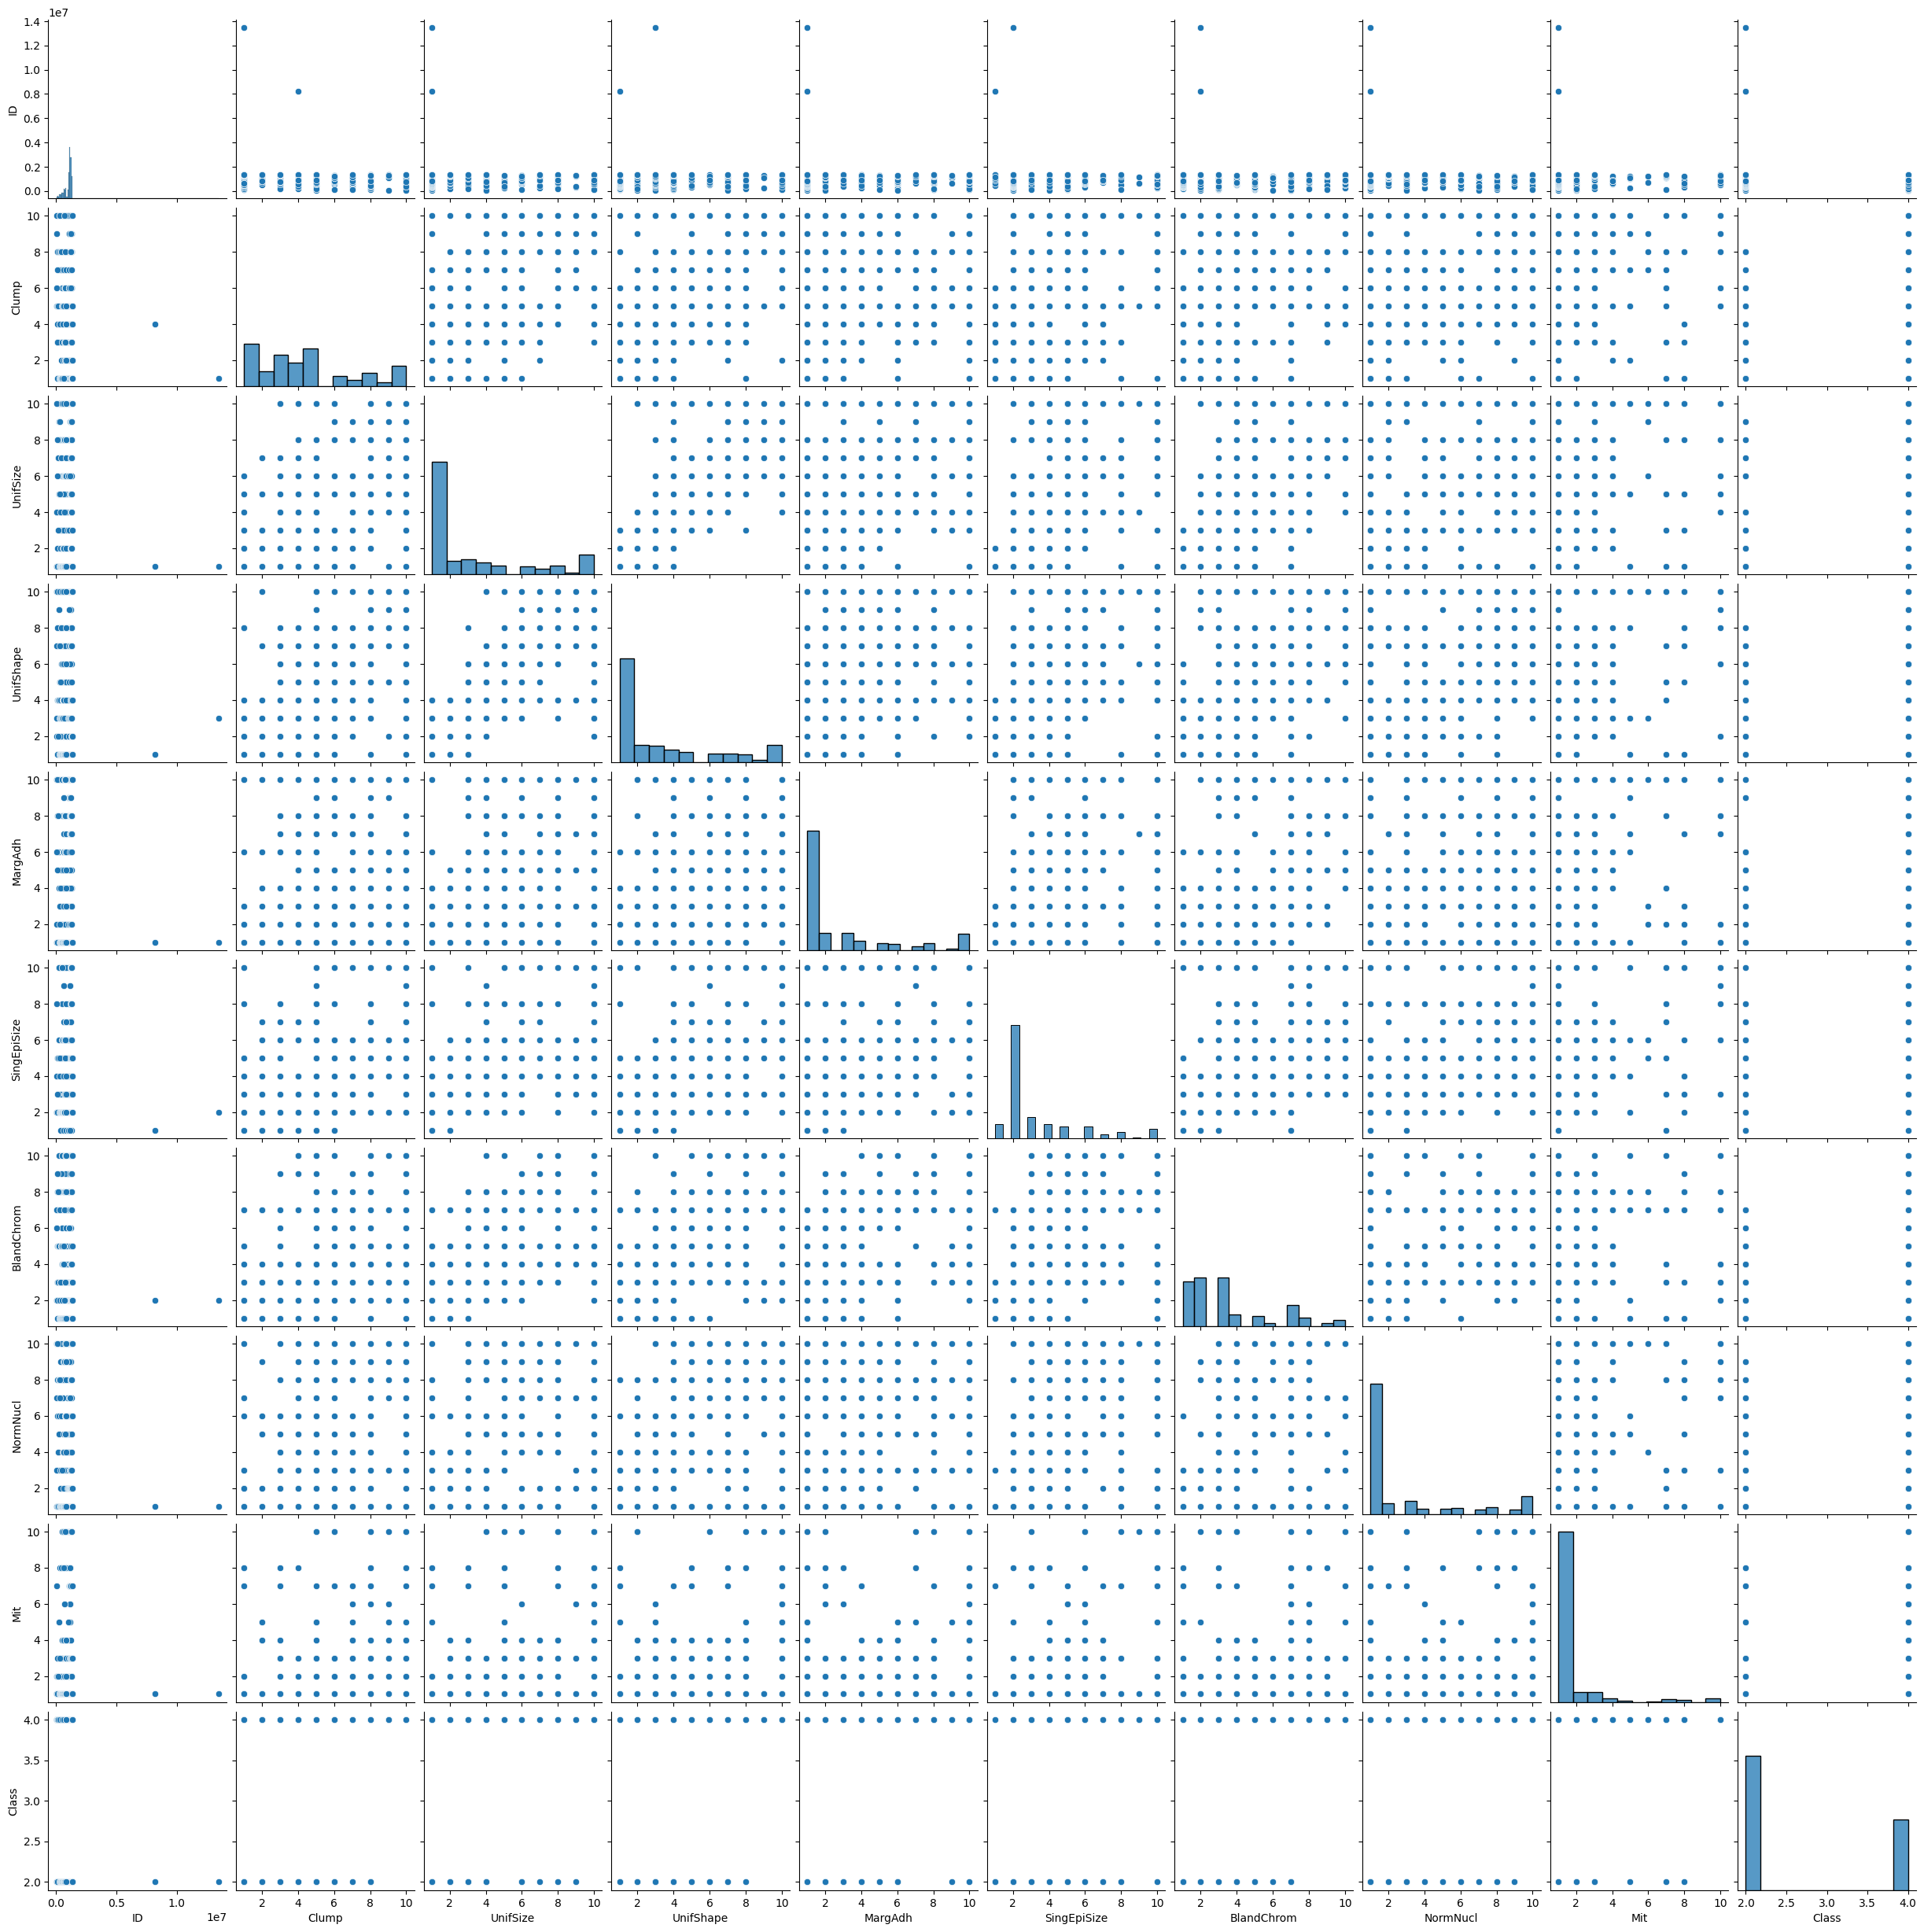

In [6]:
sns.pairplot(df)

<Axes: >

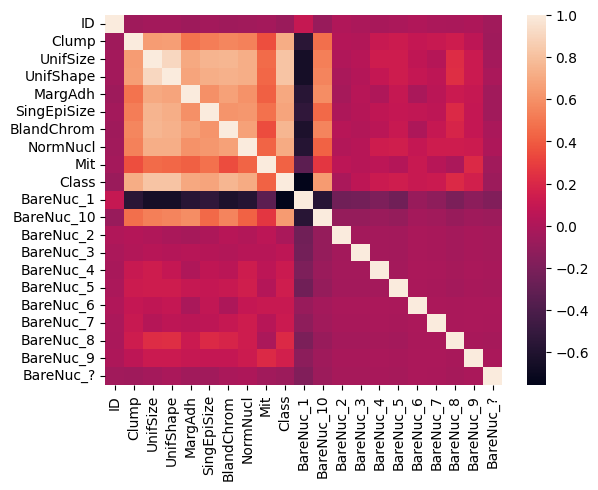

In [9]:
sns.heatmap(pd.get_dummies(df).corr())

<Axes: xlabel='Class', ylabel='count'>

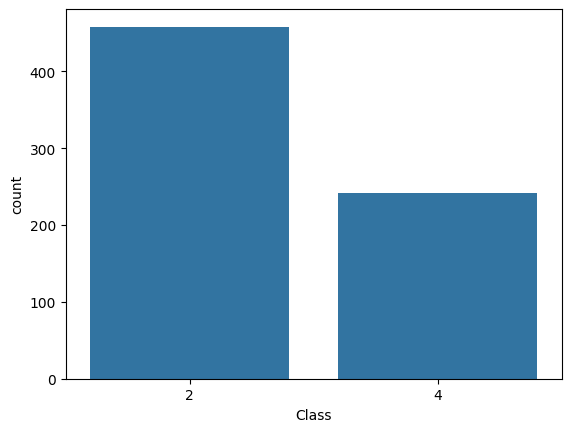

In [15]:
sns.countplot(x=df['Class'])

C:\Users\Anil kumar\AppData\Local\Temp\ipykernel_8356\2431050339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mit'],bins = 60,color='darkred',kde=False)


<Axes: xlabel='Mit'>

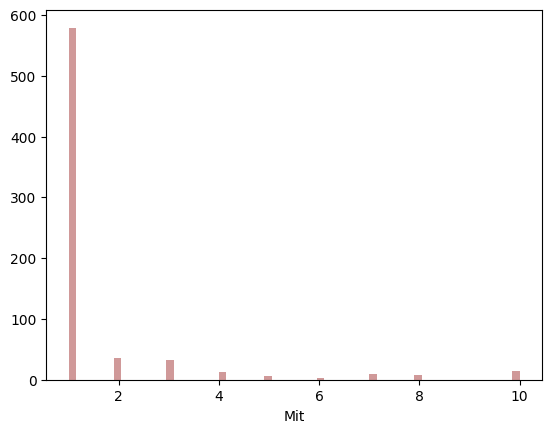

In [16]:
sns.distplot(df['Mit'],bins = 60,color='darkred',kde=False)

<Axes: xlabel='Mit', ylabel='count'>

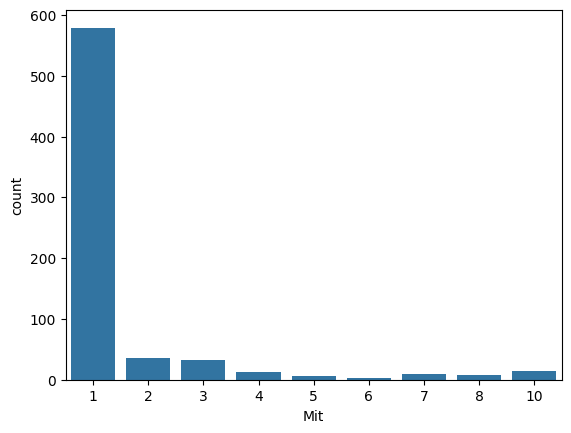

In [18]:
sns.countplot(x = df['Mit'])

In [25]:
df.drop('ID',axis = 1,inplace = True)

In [26]:
df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [32]:
X = df.drop('Class',axis=1)
X = pd.get_dummies(X)
y = df['Class']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.25,random_state=0)

In [34]:
from sklearn.svm import SVC
model = SVC();
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [35]:
# confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
print(confusion_matrix(y_pred,y_test))

[[108   3]
 [  4  60]]


In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           2       0.96      0.97      0.97       111
           4       0.95      0.94      0.94        64

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175

